In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import

In [ ]:
df = pd.read_csv('df_clean.csv')

C:\Users\norac\AppData\Local\Temp\ipykernel_24144\1955525448.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean.csv')


In [ ]:
df = df[df['STATE']=="NY"]

In [ ]:
cum = df['FIRE_YEAR'].value_counts().sort_index().cumsum()
cum = pd.DataFrame(cum)
cum.reset_index(inplace=True)
cum.rename(columns={'FIRE_YEAR':'CUMSUM'},inplace=True)

<Axes: ylabel='CUMSUM'>

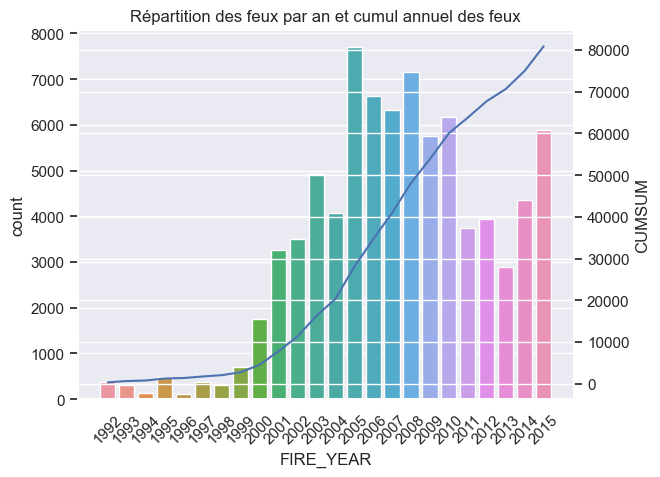

In [ ]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
sns.countplot(x='FIRE_YEAR',data=df,ax=ax1)
ax1.set_ylabel('count')
plt.xticks(rotation = 45)
plt.title('Répartition des feux par an et cumul annuel des feux');
ax2 =ax1.twinx()
sns.lineplot(x=cum.index,y=cum['CUMSUM'],data=cum,ax=ax2)

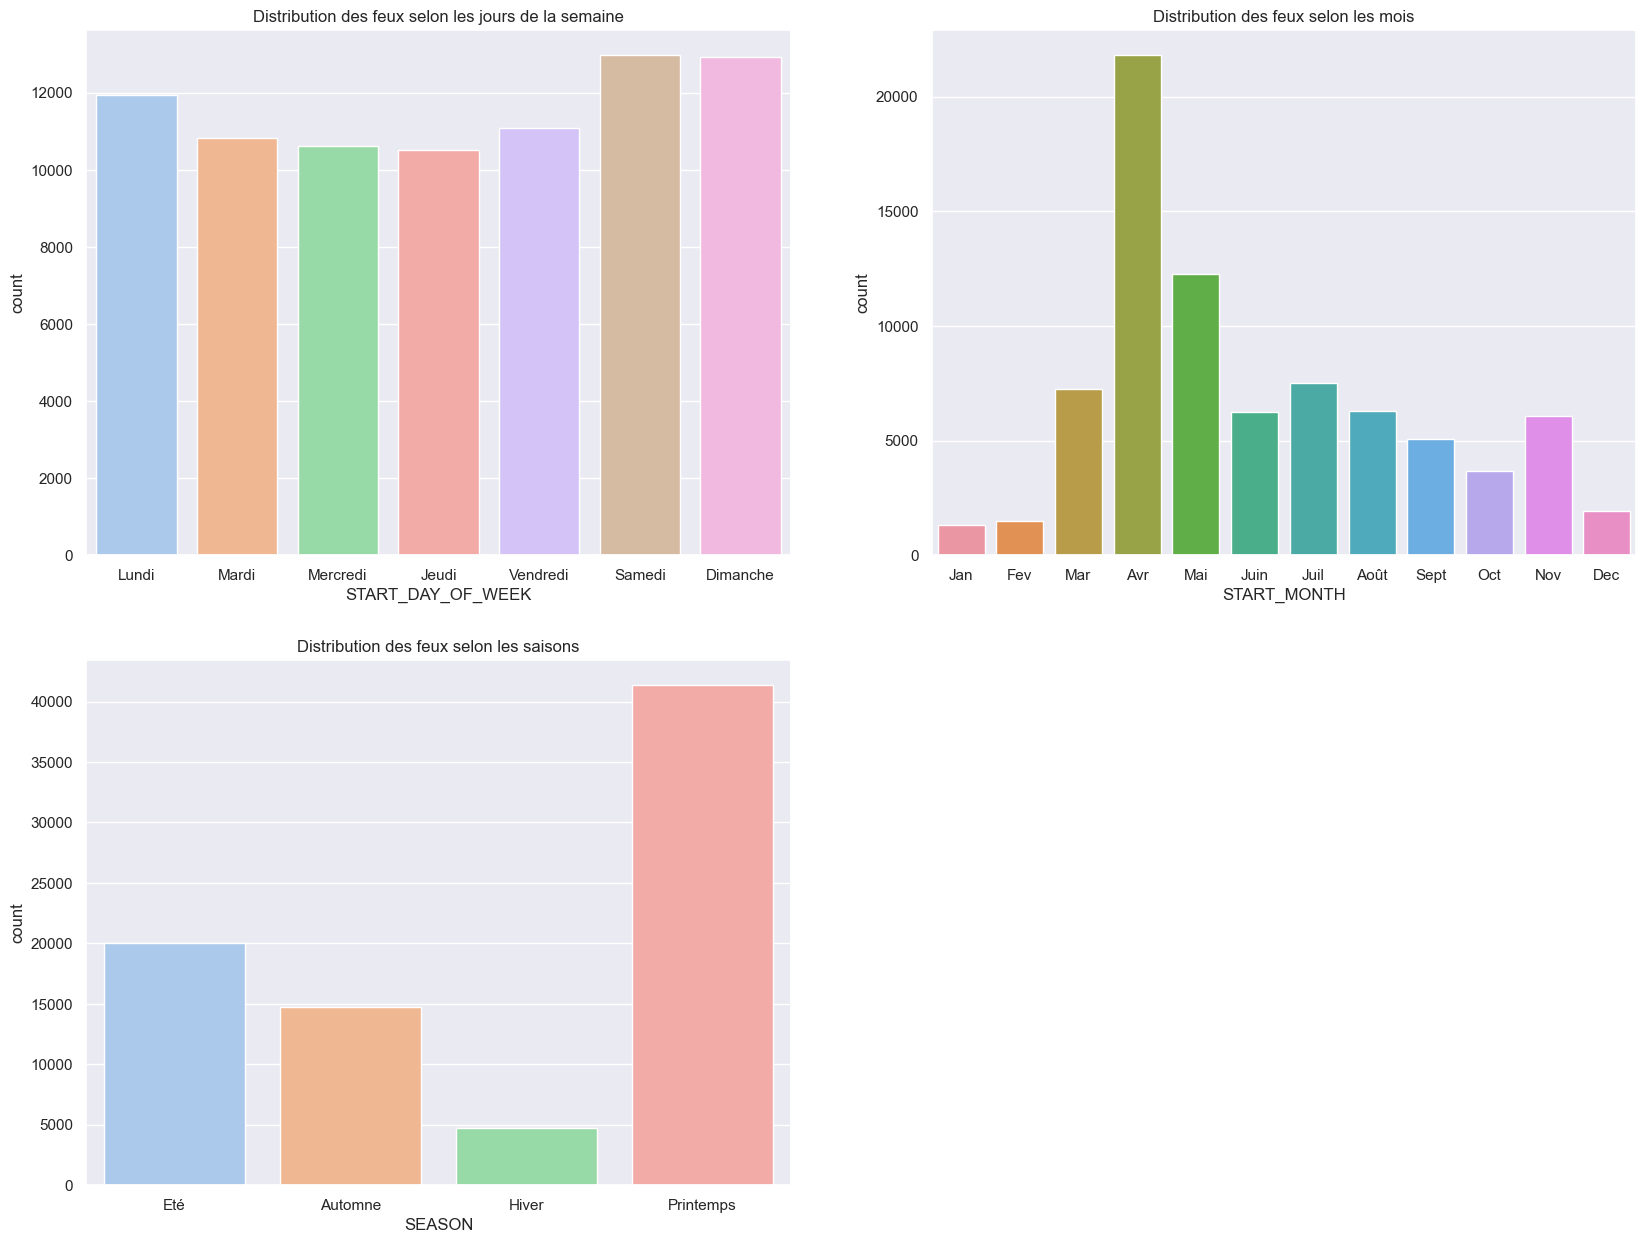

In [ ]:
sns.set_theme()
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x='START_DAY_OF_WEEK',data=df,palette='pastel')
plt.title('Distribution des feux selon les jours de la semaine')
plt.xticks([0,1,2,3,4,5,6],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
plt.subplot(2,2,2)
sns.countplot(x='START_MONTH',data=df)
plt.title('Distribution des feux selon les mois')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Fev','Mar','Avr','Mai','Juin','Juil','Août','Sept','Oct','Nov','Dec'])
plt.subplot(2,2,3)
sns.countplot(x='SEASON',data=df,palette='pastel')
plt.title('Distribution des feux selon les saisons')
plt.xticks([0,1,2,3],['Eté','Automne','Hiver','Printemps']);

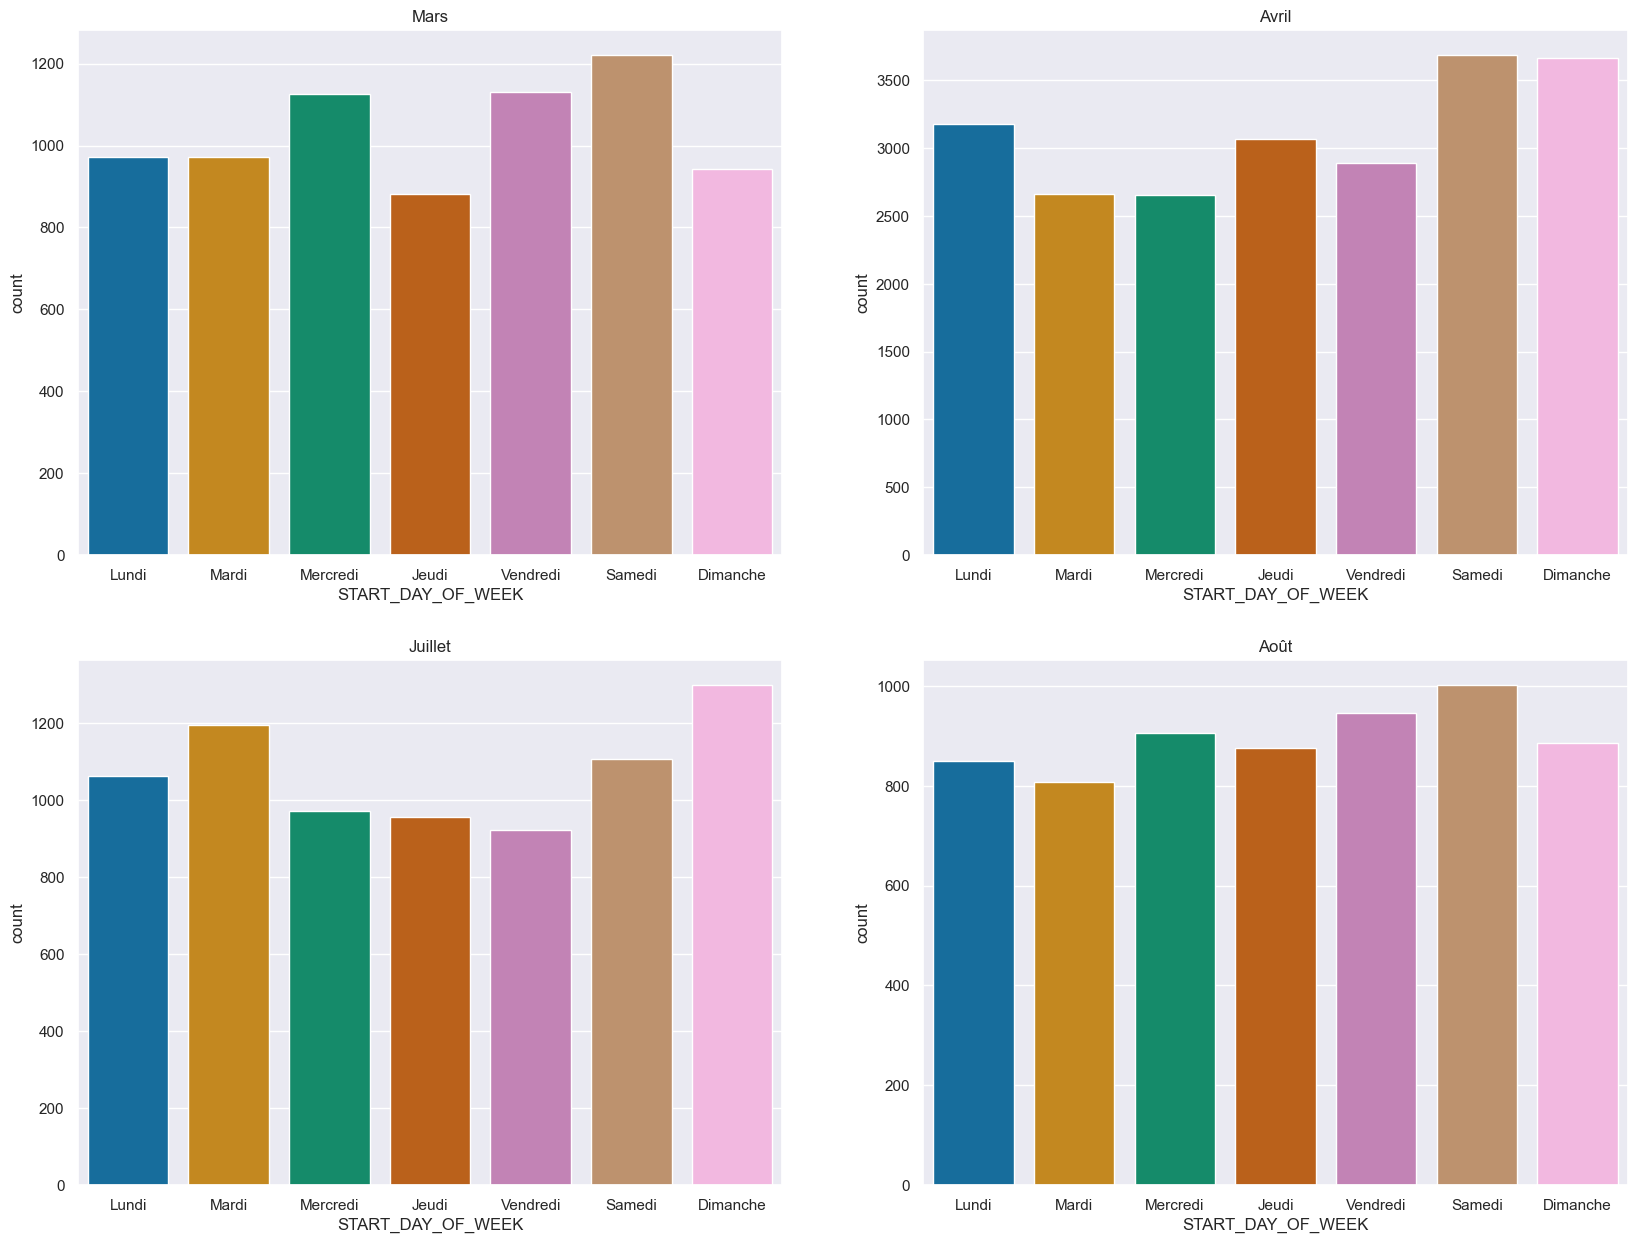

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Mars')
sns.countplot(x='START_DAY_OF_WEEK',data=df[df['START_MONTH']==3],palette='colorblind')
plt.xticks([0,1,2,3,4,5,6],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
plt.subplot(2,2,2)
plt.title('Avril')
sns.countplot(x='START_DAY_OF_WEEK',data=df[df['START_MONTH']==4],palette='colorblind')
plt.xticks([0,1,2,3,4,5,6],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
plt.subplot(2,2,3)
plt.title('Juillet')
sns.countplot(x='START_DAY_OF_WEEK',data=df[df['START_MONTH']==7],palette='colorblind')
plt.xticks([0,1,2,3,4,5,6],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
plt.subplot(2,2,4)
plt.title('Août')
sns.countplot(x='START_DAY_OF_WEEK',data=df[df['START_MONTH']==8],palette='colorblind')
plt.xticks([0,1,2,3,4,5,6],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']);

Text(0, 0.5, 'Nbre de feux signalés')

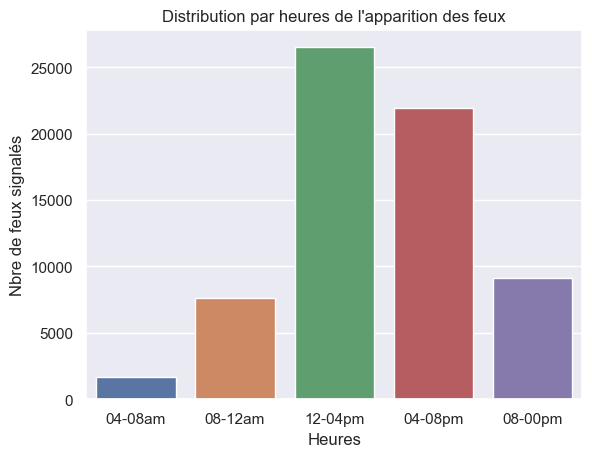

In [ ]:
df['START_TIME'] = pd.cut(df['DISCOVERY_TIME'],bins=[400,800,1200,1600,2000,2359],labels=['04-08am','08-12am','12-04pm','04-08pm','08-00pm'])
sns.countplot(x='START_TIME',data=df,order=['04-08am','08-12am','12-04pm','04-08pm','08-00pm'])
plt.title("Distribution par heures de l'apparition des feux")
plt.xlabel('Heures')
plt.ylabel('Nbre de feux signalés')